### MIE370 Project 1 --- Classification and Ensemble models
**Deadline: Sep 27th, 9PM [The deadline is firm and will be enforced strictly. Plan ahead and submit hours before the deadline to avoid the risk of lateness penalty.]**

# Project 1 **[100 Marks]**
You are going to apply several ML methods for a predictive task on a new dataset.

We're going to work with the [fake bill dataset](https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills). The dataset examine whether the bill is fraudulent based on its dimensions.  


Download it using the cells below:

In [1]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [1]:
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Part 0: Getting started **[5 Marks]**
First off, load the dataset in CSV file as a Pandas DataFrame and name it `df`. Print out the first few rows of the dataset, and take a look at the features data and the target columns.

* Identify the target column (the variable we aim to predict)?____ **[1]**
* How many features do we have in this dataset in order to predict the target? ___ **[1]**

Now add an additional column containing either 1 (if the target column is True) or 0 (if the target column is False). This will be the new target value to classify the data **[3]**

In [2]:
myfile = wget.download('https://raw.githubusercontent.com/chf-NewStart/MIE370-TA-Material/main/modified_fake_bills_csv.csv')
df = pd.read_csv(myfile, delimiter=',')

In [3]:
### YOUR CODE HERE ###
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,515.43,104.86,104.95,4.52,2.89,112.83
1,True,514.38,103.36,103.66,3.77,2.99,113.09
2,True,518.07,104.48,103.50,4.40,2.94,113.16
3,True,514.08,103.91,103.94,3.62,3.01,113.51
4,True,515.19,104.28,103.46,4.04,3.48,112.54


- The target column is: is_genuine



- This dataset contains 6 features in order to predict the target. They are: diagonal, height_left, height_right, margin_low, margin_up, length.

In [4]:
# Firt identify the data types of each column
df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [5]:
# The additional target column
df["target"] = df["is_genuine"].apply(lambda x: 1 if x == True else 0)
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,target
0,True,515.43,104.86,104.95,4.52,2.89,112.83,1
1,True,514.38,103.36,103.66,3.77,2.99,113.09,1
2,True,518.07,104.48,103.50,4.40,2.94,113.16,1
3,True,514.08,103.91,103.94,3.62,3.01,113.51,1
4,True,515.19,104.28,103.46,4.04,3.48,112.54,1


In [6]:
# check if converted correctly

# number of is_genuine == True and == False
print(df[df["is_genuine"] == True].shape)
print(df[df["is_genuine"] == False].shape)

# number of target == 1 and == 0
print(df[df["target"] == 1].shape)
print(df[df["target"] == 0].shape)

# now we know that both the columns have the same numbers of True(or 1) and False(or 0), we check if they are aligned with each other
is_consistent = df["is_genuine"] == (df["target"] == 1)
print((is_consistent == False).sum())
# so we see that the is_genuine and target is very aligned, since the sum of they not aligned = 0

(1000, 8)
(500, 8)
(1000, 8)
(500, 8)
0


# Part A: Pre-processing **[16 Marks Total]**

## Part A1: Data Cleaning **[6 marks]**

Each row in this dataset represents the physical measurements of a single banknote (paper money).

The columns include various dimensions of the banknote, such as its diagonal, left height, right height, lower margin, upper margin, and total length. The 'is_genuine' column indicates whether the banknote is genuine or counterfeit.


Check for missing values **[2]**. If any missing values are found, delete the entire row **[2]**

Report the size of the dataset after this operation (how many rows and how many columns after the cleaning) **[2]**

Some useful hints:


*   [THIS](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) returns a boolean same-sized object indicating if the values are NA.
*   [THIS](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) removes missing values.





In [7]:
### YOUR CODE HERE ###

# check which column has the missing value
print(df.isna().sum())

# check which row contains the miss value
display(df[df["margin_low"].isna()])


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
target           0
dtype: int64


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,target
72,True,515.82,103.89,103.45,NaN,3.25,112.79,1
99,True,515.79,104.07,104.18,NaN,3.14,113.08,1
151,True,516.21,103.80,104.38,NaN,3.02,112.93,1
197,True,514.35,103.66,103.80,NaN,3.62,113.27,1
241,True,515.49,104.14,104.06,NaN,3.02,112.36,1
251,True,515.40,103.26,102.82,NaN,2.95,113.22,1
284,True,515.76,103.83,103.76,NaN,3.23,113.29,1
334,True,515.55,103.70,103.96,NaN,3.00,113.36,1
410,True,517.68,103.72,103.51,NaN,3.12,112.95,1
413,True,516.90,103.66,103.50,NaN,3.16,112.95,1


In [8]:
# delete the row with missing value
df.dropna(axis=0, inplace=True)

In [9]:
# check the size of df after remove them
df.shape

(1463, 8)

The size of the dataframe is 1463*8 (1463 rows, 8 columns) after deleting the row with miss value.
On the other hand, since we found that there are 37 rows containing the missing value of margin_low, 1500 - 37 = 1463, which aligns with our conclusion.

## Part A2: Final Clean Up Before Splitting **[3 Marks]**


Since our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) Therefore, it is best practice to have a training set (from which there is a rotating validation subset) and a test set.

**BUT BEFORE SPLITTING (you will perform splitting the dataset in Part A3), Let's do some final clean ups in this part:**

See the example given [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

* The first argument in train_test_split
is the **X value** (the quanities we use
in order to predict)
* The second argument is the **y value** (the quantity we want to predict)

We need to only keep the feature columns for the X value. Given that, prepare the variables X and y. **[3]**

Check [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) example to see how to drop columns

*hint: use axis = 1 to drop columns, otherwise it's defaulted to axis = 0 which is used to drop rows*


In [10]:
### YOUR CODE HERE ###
X = df.drop(["target", "is_genuine"], axis=1)
y = pd.DataFrame(df["target"])
display(X)
display(y)
# convert to array to fit in the train_test_split
X = X.to_numpy()
y = y.to_numpy()
print(f"{X}, {y}")

,diagonal,height_left,height_right,margin_low,margin_up,length
0,515.43,104.86,104.95,4.52,2.89,112.83
1,514.38,103.36,103.66,3.77,2.99,113.09
2,518.07,104.48,103.50,4.40,2.94,113.16
3,514.08,103.91,103.94,3.62,3.01,113.51
4,515.19,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,515.25,104.38,104.17,4.42,3.09,111.28
1496,516.57,104.63,104.44,5.27,3.37,110.97
1497,515.40,104.01,104.12,5.51,3.36,111.95
1498,516.18,104.28,104.06,5.17,3.46,112.25


,target
0,1
1,1
2,1
3,1
4,1
...,...
1495,0
1496,0
1497,0
1498,0


[[515.43 104.86 104.95   4.52   2.89 112.83]
 [514.38 103.36 103.66   3.77   2.99 113.09]
 [518.07 104.48 103.5    4.4    2.94 113.16]
 ...
 [515.4  104.01 104.12   5.51   3.36 111.95]
 [516.18 104.28 104.06   5.17   3.46 112.25]
 [514.41 104.15 103.82   4.63   3.37 112.07]], [[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


## Part A3: Data Splitting **[3 Marks]**

Now that we have the X and y values, we can split the dataset into training and testing.

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=21``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[3]**

**Only Split the dataset once within your notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [11]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=21)

In [12]:
# check our splitted data
print(f"X_train: {X_train}\n\nX_test: {X_test}\n\ny_train: {y_train}\n\ny_test: {y_test}")
print(f"X_train: {len(X_train)} X_test: {len(X_test)} y_train: {len(y_train)} y_test: {len(y_test)}")


X_train: [[516.03 104.58 103.89   3.96   2.87 113.28]
 [516.39 104.09 104.16   5.45   3.38 111.79]
 [514.95 104.   104.53   5.69   3.41 111.09]
 ...
 [516.84 103.98 103.98   4.51   2.92 113.07]
 [514.77 104.05 104.4    5.05   3.45 111.14]
 [514.32 103.96 103.92   3.68   2.89 113.21]]

X_test: [[517.11 104.03 104.47   4.95   3.25 111.99]
 [517.35 103.99 104.39   3.43   2.66 112.93]
 [515.85 103.77 103.81   4.13   3.09 113.24]
 ...
 [515.19 103.82 103.85   3.97   3.12 112.85]
 [514.59 103.53 103.63   4.04   2.96 112.76]
 [515.37 103.74 103.48   4.6    2.8  113.35]]

y_train: [[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]]

y_test: [[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]


## Part A4: Effect of Standardization (Visual) **[4 Marks]**

Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is the `height_left`, and the y-axis is the `diagonal`, and the color of each datapoint indicates its class.  **[2]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? You can visualize feature distributions before and after standardization **[2]**




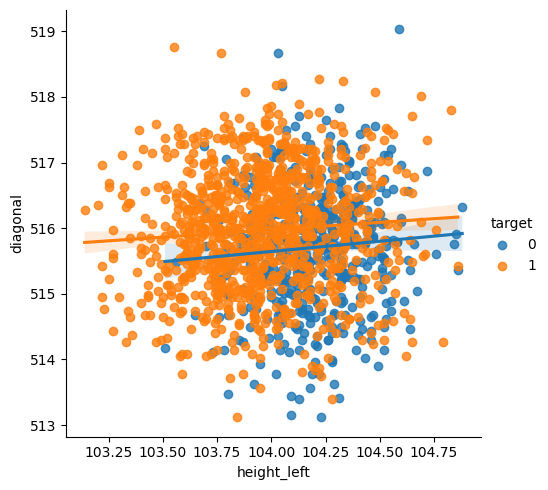

In [13]:
### YOUR CODE HERE ###
import seaborn
# feature distributions before standardization
seaborn.lmplot(df, x="height_left", y="diagonal", hue="target")

In [14]:
# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(df.drop(columns=["target", "is_genuine"]))
standard_df = scaler.transform(df.drop(columns=["target", "is_genuine"]))

standard_df = pd.DataFrame(standard_df, columns=df.columns[1:-1])
standard_df


,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.488594,2.766807,3.173766,0.051286,-1.136982,0.177842
1,-1.634809,-2.241490,-0.806851,-1.078937,-0.704806,0.475692
2,2.393318,1.498039,-1.300571,-0.129549,-0.920894,0.555882
3,-1.962299,-0.405114,0.057159,-1.304982,-0.618370,0.956834
4,-0.750586,0.830266,-1.424001,-0.672057,1.412861,-0.154375
...,...,...,...,...,...,...
1458,-0.685088,1.164152,0.766882,-0.099410,-0.272629,-1.597801
1459,0.755868,1.998868,1.600034,1.181509,0.937466,-1.952929
1460,-0.521343,-0.071228,0.612594,1.543181,0.894249,-0.830265
1461,0.330131,0.830266,0.427449,1.030813,1.326425,-0.486592


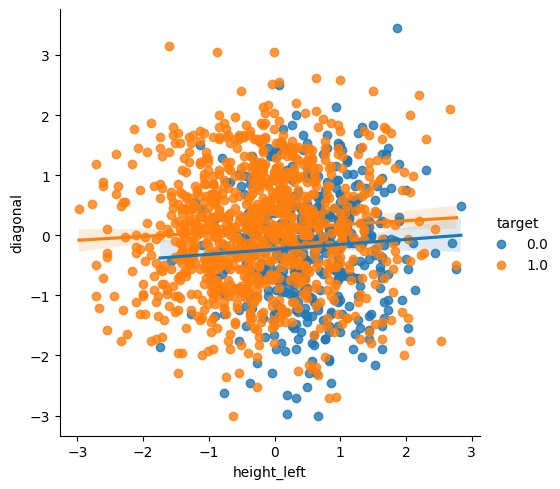

In [15]:
# feature distributions after standardization
# concat back the target class for color
target_temp = pd.DataFrame(df["target"])

# reset the index of df (since we drop a few rows which cause the index of df different)
df = df.reset_index(drop=True)

# join the 2 df for plotting only
standard_df = standard_df.join(target_temp)
seaborn.lmplot(standard_df, x="height_left", y="diagonal", hue="target")

- The difference is that that second plot was standardized by mean=0 and std=1, so its x and y value becomes in range of [-3, 3].
- The reason why that the 2 plots look the similar is that according to the dataset source website, both the height_left and diagonal data were measure in same scale -- mm. Besides, the magnitude of height_left and diagonal (100ish vs 515ish) is not a big difference, and their standard deviation, according to the plot is also not very large in range. Hence, there is no a very large scale or large range in one of the axis that minizes the affect of other axis.
- The advantage of standardization is that it allows the algorithms to not prioritize the feature with the larger range, balancing the influence of the smaller feature and larger feature, so they weight euqally.

# Part B: KNN **[32 Marks Total]**

## Part B1: KNN Model with Standardization **[12 Marks]**

Let's create a KNN Model to predict whether a bill is fake by its dimensions!


Follow these steps:

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[2]**

2. Train a KNN Model using 5-fold cross-validation on the dataset. Sweep `k` (number of neighbors) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[4]**
3.   What is the best `k`? What is the highest cross-validation accuracy? **[4]**
4. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves.). **[2]**



**Note:** When we standardize a dataset, it matters if the data points are in our training set or test set. The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot use the mean or standard deviation of the whole dataset to standardize it - we can only use the mean and standard deviation of the training set. When the model is ready for testing, we provide our scalers (mean and standard deviation of our training set) to the person who is going to test the model. They can scale their data (test set) with our training set's mean and standard deviation. It is unlikely that the scaled test set would exactly have a mean of zero and a standard deviation of one, but there is no such requirement for the model to perform well.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

In [16]:
### YOUR CODE HERE ###
# convert y to 1D arrary, after getting the output warning of DataConversionWarning: A column-vector y was 
    # passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
    # return self._fit(X, y)
y_train = y_train.ravel()

In [17]:
# 5 fold cross validation
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# k from 1 to 100
k_values = range(1, 101) 
val_cv_acc = []
train_cv_acc = []

for k in k_values:
      # the source that help provides mentioned about pipeline
      # "implements the Transformer API to compute the mean and standard deviation on a training set so as 
      # to be able to later re-apply the same transformation on the testing set."
      pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=k))
      ])
      
      # knn = KNeighborsClassifier(n_neighbors=k)

      # 5 flod cross-validation
      cv = KFold(n_splits=5,
            shuffle=True,
            random_state=0, )
      cv_results = cross_validate(pipeline,
                              X_train,
                              y_train,
                              cv=cv,
                              return_train_score=True)

      # cal the accurarcy
      train_score = np.mean(cv_results['train_score'])
      val_score = np.mean(cv_results['test_score'])
      
      train_cv_acc.append(train_score)
      val_cv_acc.append(val_score)

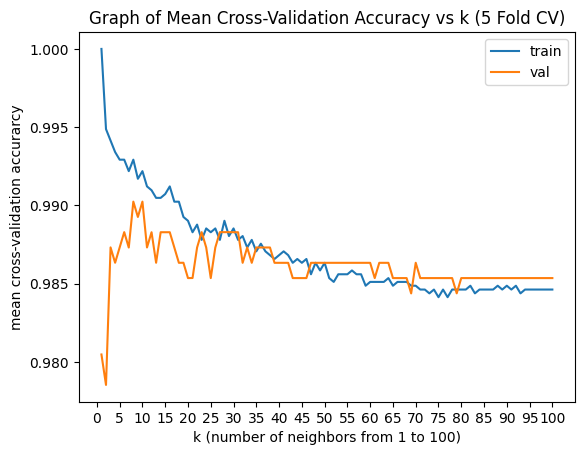

In [18]:
# plot
plt.plot(k_values, train_cv_acc, label="train")
plt.plot(k_values, val_cv_acc, label="val")
plt.xlabel("k (number of neighbors from 1 to 100)")
plt.xticks(np.arange(0, 101, 5))  # show every 5th k-value
plt.ylabel("mean cross-validation accurarcy")
plt.title("Graph of Mean Cross-Validation Accuracy vs k (5 Fold CV)")
plt.legend()
plt.show()

In [19]:
# get the best k and highest val acc
best_k = k_values[np.argmax(val_cv_acc)]
highest_val_acc = np.max(val_cv_acc)

print(f"The best k is: {best_k}")
print(f"The highest cv acc is: {highest_val_acc}")

The best k is: 8
The highest cv acc is: 0.9902391200382592


3. Best k is k=8 and k=10, where the validation accuracy reached the highest. The highest CV accuracy is around 0.9902.
4. k = 0 to 22 lead to underfit and k = 50 to 100 lead to overfit.

## Part B2: Feature Selection **[20 Marks Total]**
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature importance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see Step 7 in Part B3.1 below) are not met, we need to repeat the process and remove another feature.


  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
### YOUR CODE HERE ###
# the coding for Part B2 is in B3.1 below


## Part B3.1 Create the Feature_selector function

Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and:
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbors) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is below **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.


In [20]:
### YOUR CODE HERE ###
from sklearn import tree
def feature_selector(X_train, y_train, k_ub, threshold=0.95):
        stop = False
        # Initialize the list of current feature indices
        current_features = list(range(X_train.shape[1]))
        removed_features = []

        # list containing best cv scores and corresponding k value
        # found out that originally the stored val acc and k value is correspond to the previous n-1 features
        # not the score after remove the nth feature
        cv_scores = []
        best_k_values = []
        # may remove !!
        
        while(not stop):
                # for features
                features = []
                # current feature 
                X_train_current = X_train[:, current_features]
                
                # decision tree
                dt = tree.DecisionTreeClassifier()
                dt.fit(X_train_current, y_train)
                importance = dt.feature_importances_
                
                # (original idx of the current feature, corresponding score)
                for idx, score in zip(current_features, importance):
                        print(f'Feature: {idx}, Score: {score:.5f}')
                        features.append((idx, score))
                        
                        
                # then train the knn
                k_values = range(1, k_ub)
                val_cv_acc = []
                
                # for hyperparameter tuning, we just loop oever 1 to k_ub to find the best among 1 to k_ub and select the k 
                # inside with the best val acc
                for k in k_values:
                        knn = KNeighborsClassifier(n_neighbors=k)

                        # 5 flod cross-validation
                        cv = KFold(n_splits=5,
                                shuffle=True,
                                random_state=0)
                        cv_results = cross_validate(knn,
                                                X_train_current,
                                                y_train,
                                                cv=cv)

                        val_score = np.mean(cv_results['test_score'])
                        val_cv_acc.append(val_score)
                        
                # find the best k value      
                best_k = k_values[np.argmax(val_cv_acc)]
                highest_val_acc = np.max(val_cv_acc)
                
                # store the val acc and best k
                cv_scores.append(highest_val_acc)
                best_k_values.append(best_k)
                
                # print out the best k and its val acc for hyperparameter tunning
                print(f"The best k for k in range 1 to {k_ub-1} is: {best_k}, with val acc: {highest_val_acc}")
                
                # if val acc lower than 95% of the val acc using whole feature, stop
                if val_score < threshold * highest_val_acc or len(current_features) == 1:
                        stop = True 
                        break
        
                # remove
                if len(features) > 1:
                        # debug
                        print(f"num features: {len(features)}")
                        
                        
                        # find the least important feature
                        min_feature = min(features, key=lambda x: x[1])
                        print(f'Reomoving feature: {min_feature[0]}, with importance score: {min_feature[1]:.5f}')
                        current_features.remove(min_feature[0])
                        removed_features.append(min_feature[0])
                                
                else:
                        stop = True 
                        break
                
        # the first index is the val acc and k for including all features
        rem_fea_val_acc_best_k = []
        rem_fea_val_acc_best_k.append([None, cv_scores[0], best_k_values[0]])
        
        # then append the following
        for i in range (1, 6):
                rem_fea_val_acc_best_k.append([removed_features[i-1], cv_scores[i], best_k_values[i]])
        # return the list_removed_features, coresponding val acc, and k 
        return rem_fea_val_acc_best_k

In [21]:
# hyperparameter:
# k_ub = 51, threshold = 0.95
rem_fea_val_acc_best_k_0 = feature_selector(X_train, y_train, k_ub=51, threshold=0.95)
rem_fea_val_acc_best_k_0

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00086
Feature: 2, Score: 0.01421
Feature: 3, Score: 0.11730
Feature: 4, Score: 0.02893
Feature: 5, Score: 0.83870
The best k for k in range 1 to 50 is: 5, with val acc: 0.9882831181252989
num features: 6
Reomoving feature: 0, with importance score: 0.00000
Feature: 1, Score: 0.00086
Feature: 2, Score: 0.01865
Feature: 3, Score: 0.10996
Feature: 4, Score: 0.03183
Feature: 5, Score: 0.83870
The best k for k in range 1 to 50 is: 3, with val acc: 0.990234337637494
num features: 5
Reomoving feature: 1, with importance score: 0.00086
Feature: 2, Score: 0.01984
Feature: 3, Score: 0.11368
Feature: 4, Score: 0.03158
Feature: 5, Score: 0.83490
The best k for k in range 1 to 50 is: 3, with val acc: 0.990234337637494
num features: 4
Reomoving feature: 2, with importance score: 0.01984
Feature: 3, Score: 0.12542
Feature: 4, Score: 0.03152
Feature: 5, Score: 0.84306
The best k for k in range 1 to 50 is: 3, with val acc: 0.9912099473935916
num features:

[[None, 0.9882831181252989, 5],
 [0, 0.990234337637494, 3],
 [1, 0.990234337637494, 3],
 [2, 0.9912099473935916, 3],
 [4, 0.9853562888570062, 5],
 [3, 0.9570349115255858, 25]]

In [22]:
# hyperparameter: 
# k_ub = 51, threshold = 0.98
rem_fea_val_acc_best_k_1 = feature_selector(X_train, y_train, k_ub=51, threshold=0.98)
rem_fea_val_acc_best_k_1

Feature: 0, Score: 0.00835
Feature: 1, Score: 0.00086
Feature: 2, Score: 0.00785
Feature: 3, Score: 0.11531
Feature: 4, Score: 0.02893
Feature: 5, Score: 0.83870
The best k for k in range 1 to 50 is: 5, with val acc: 0.9882831181252989
num features: 6
Reomoving feature: 1, with importance score: 0.00086
Feature: 0, Score: 0.00155
Feature: 2, Score: 0.01984
Feature: 3, Score: 0.11849
Feature: 4, Score: 0.02522
Feature: 5, Score: 0.83490
The best k for k in range 1 to 50 is: 3, with val acc: 0.9882831181252989
num features: 5
Reomoving feature: 0, with importance score: 0.00155
Feature: 2, Score: 0.01984
Feature: 3, Score: 0.11632
Feature: 4, Score: 0.02522
Feature: 5, Score: 0.83862
The best k for k in range 1 to 50 is: 3, with val acc: 0.990234337637494
num features: 4
Reomoving feature: 2, with importance score: 0.01984
Feature: 3, Score: 0.12889
Feature: 4, Score: 0.02805
Feature: 5, Score: 0.84306
The best k for k in range 1 to 50 is: 3, with val acc: 0.9912099473935916
num features

[[None, 0.9882831181252989, 5],
 [1, 0.9882831181252989, 3],
 [0, 0.990234337637494, 3],
 [2, 0.9912099473935916, 3],
 [4, 0.9853562888570062, 5],
 [3, 0.9570349115255858, 25]]

In [23]:
# hyperparameter: 
# k_ub = 101, threshold = 0.95
rem_fea_val_acc_best_k_2 = feature_selector(X_train, y_train, k_ub=101)
rem_fea_val_acc_best_k_2

Feature: 0, Score: 0.01124
Feature: 1, Score: 0.00375
Feature: 2, Score: 0.01132
Feature: 3, Score: 0.10606
Feature: 4, Score: 0.02893
Feature: 5, Score: 0.83870
The best k for k in range 1 to 100 is: 5, with val acc: 0.9882831181252989
num features: 6
Reomoving feature: 1, with importance score: 0.00375
Feature: 0, Score: 0.00289
Feature: 2, Score: 0.01540
Feature: 3, Score: 0.11788
Feature: 4, Score: 0.02893
Feature: 5, Score: 0.83490
The best k for k in range 1 to 100 is: 3, with val acc: 0.9882831181252989
num features: 5
Reomoving feature: 0, with importance score: 0.00289
Feature: 2, Score: 0.01540
Feature: 3, Score: 0.12077
Feature: 4, Score: 0.02893
Feature: 5, Score: 0.83490
The best k for k in range 1 to 100 is: 3, with val acc: 0.990234337637494
num features: 4
Reomoving feature: 2, with importance score: 0.01540
Feature: 3, Score: 0.12542
Feature: 4, Score: 0.03152
Feature: 5, Score: 0.84306
The best k for k in range 1 to 100 is: 3, with val acc: 0.9912099473935916
num feat

[[None, 0.9882831181252989, 5],
 [1, 0.9882831181252989, 3],
 [0, 0.990234337637494, 3],
 [2, 0.9912099473935916, 3],
 [4, 0.9853562888570062, 5],
 [3, 0.9570349115255858, 25]]


## Part B3.2 Implement the Feature_selector function **[20 Marks]**


Call your Feature_selector function on the standardized training data with a threshold of 95%.


* Visualize your results by plotting the mean cross-validation accuracy (y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbors with respect to the number of features.  **[5]**

* State what is the number of essential features for classification, and justify your answer.  **[5]**

* State and record the best accuracy  **[5]**

In [24]:
### YOUR CODE HERE ###
# I will use the rem_fea_val_acc_best_k_0 for plotting the 1st graph
rem_fea_val_acc_best_k_0

[[None, 0.9882831181252989, 5],
 [0, 0.990234337637494, 3],
 [1, 0.990234337637494, 3],
 [2, 0.9912099473935916, 3],
 [4, 0.9853562888570062, 5],
 [3, 0.9570349115255858, 25]]

In [25]:
# reverse the val_acc order
val_acc = [acc[1] for acc in rem_fea_val_acc_best_k_0[::-1]]
print(val_acc)

# num of features
num_features = [i for i in range(1, 7)]
print(num_features)

[0.9570349115255858, 0.9853562888570062, 0.9912099473935916, 0.990234337637494, 0.990234337637494, 0.9882831181252989]
[1, 2, 3, 4, 5, 6]


Text(0.5, 1.0, 'Mean CV Accurarcy vs. Number of Feature')

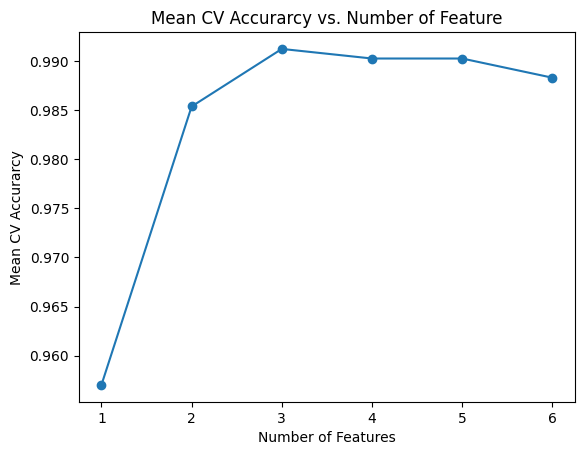

In [26]:
# plotting
plt.plot(num_features, val_acc, marker="o")
plt.xlabel("Number of Features")
plt.ylabel("Mean CV Accurarcy")
plt.title("Mean CV Accurarcy vs. Number of Feature")

In [27]:
# reverse the best k vals
rev_best_k_val = [k[2] for k in rem_fea_val_acc_best_k_0[::-1]]
rev_best_k_val

[25, 5, 3, 3, 3, 5]

Text(0.5, 1.0, 'Best K Values vs. Number of Feature')

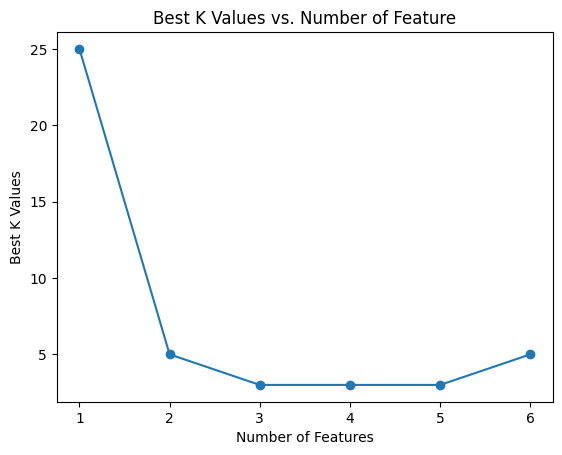

In [28]:
# plotting
plt.plot(num_features, rev_best_k_val, marker="o")
plt.xlabel("Number of Features")
plt.ylabel("Best K Values")
plt.title("Best K Values vs. Number of Feature")

- The number of essential features for classifications is 3 features. According to the graph mean accurarcy vs. number of features, the accurarcy reaches the maximum when number of features = 3, and remains high after we add in more features(4, 5, 6), and the best k values vs. number of features graph also proved this, as we can see the best k values droped to the lowest at 3 features, and remains very low after 3. 

In [29]:
val_acc[2]

0.9912099473935916

- The best accurarcy is about 0.9912, when number of features = 3.

# Part C: Other Built-in Models & Hyperparameter Tuning **[30 Marks Total]**

In this part, you will use some built-in models, and **tune their hyperparameters** to achieve high accuracy/scores.

Here we want you to **pass in the full feature**, so no need to use the Feature_selector function anymore.

The models you will be using are:

1. Decision Tree (Part C1.1)
2. Random Forest (Part C1.2)
3. Bagged Trees (Part C1.3)
4. Gradient Boosted Trees (Part C1.4)
5. SVM with Polynomial Kernel (Part C2.1)
6. SVM with RBF Kernel (Part C2.2)



## Pact C-1: Tree-based Models **[20 Marks Total]**

## Part C1.1: Decision Tree Classifier **[5 Marks]**

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the hyperparameters `max_depth` and `min_samples_split` using [RandomizedSearchCV ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with n_iter=500, you should set the ranges of the hyperparameters as the following:

* `'max_depth': randint(1, 10)`
* `'min_samples_split': randint(2, 50)`


For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,
* `return_train_score=True`

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best performance using decision tree is 0.987654321 with a max depth of 8 and a min samples split of 25*


In [31]:
### YOUR CODE HERE ###
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

def decision_tree_classifier():
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('dt', tree.DecisionTreeClassifier(random_state=42))
        ])

    # Define the hyperparameter distribution
    param_distributions = {
        # must use dt__, otherwise nvalid parameter 'max_depth' for estimator Pipeline(steps=[('scaler', StandardScaler()),
        # ('dt', DecisionTreeClassifier(random_state=42))]). Valid parameters are: ['memory', 'steps', 'verbose'].
        'dt__max_depth': randint(1, 10),  
        'dt__min_samples_split': randint(2, 50)  
    }
    
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        cv=5, 
        verbose=2, 
        random_state=42, 
        n_jobs=-1, 
        return_train_score=True, 
        n_iter=500,
        scoring='accuracy'
        )

    random_search.fit(X_train, y_train)

    # find the highest man cv acc and best hyperparameters
    best_score = random_search.best_score_
    best_params = random_search.best_params_
    
    best_max_depth = best_params["dt__max_depth"]
    best_min_samples_split = best_params["dt__min_samples_split"]
    
    print(f"Best performance using decision tree is {best_score} with a max depth of {best_max_depth} and a min samples split of {best_min_samples_split}!")
    return f"Best performance using decision tree is {best_score} with a max depth of {best_max_depth} and a min samples split of {best_min_samples_split}!"
                

In [32]:
dt_result = decision_tree_classifier()

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best performance using decision tree is 0.9824390243902439 with a max depth of 5 and a min samples split of 3!


## Part C1.2: Random Forests **[5 Marks]**

Train a Random Forest classifier on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and check the example there.) Tune the `n_estimators` and `max_features` parameters of the classifier using [RandomizedSearchCV ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with n_iter=500, you should set the ranges of the hyperparameters you want to tune, set:

* `max_features : ['sqrt', 'log2', 0.1, 0.25, 0.5]`,
* `n_estimators : randint(10, 200)`


For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best n_estimators: 60, Best Max Features: log2, Best Accuracy: 0.987654321*


In [33]:
### YOUR CODE HERE ###
from sklearn.ensemble import RandomForestClassifier
def random_forest_classifier():
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('rf', RandomForestClassifier(random_state=42))
        ])

    # Define the hyperparameter distribution
    param_distributions = {
        'rf__max_features': ['sqrt', 'log2', 0.1, 0.25, 0.5],  
        'rf__n_estimators': randint(10, 200)  
    }
    
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        cv=5, 
        verbose=2, 
        random_state=42, 
        n_jobs=-1, 
        n_iter=500,
        )

    random_search.fit(X_train, y_train)

    # find the highest man cv acc and best hyperparameters
    best_score = random_search.best_score_
    best_params = random_search.best_params_
    
    best_max_features = best_params["rf__max_features"]
    best_n_estimators = best_params["rf__n_estimators"]
    
    print(f"Best n_estimators: {best_n_estimators}, Best Max Features: {best_max_features}, Best Accuracy: {best_score}!")
    return f"Best n_estimators: {best_n_estimators}, Best Max Features: {best_max_features}, Best Accuracy: {best_score}!"

In [34]:
rf_result = random_forest_classifier()

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best n_estimators: 81, Best Max Features: 0.1, Best Accuracy: 0.9912195121951219!


## Part C1.3: Bagging (ensemble of bagged trees) **[5 Marks]**

Similarly, train a bagging classifier on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and check the example there.) Here we can set the max_features to the number of features in our dataset.


Then tune the `n_estimators` parameter of the classifier using cross-validation (CV).

Set:

* `n_estimators = [10, 50, 100, 200]`


Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best n_estimators (Bagged Trees): 100, Best Accuracy (Bagged Trees): 0.987654321*


In [38]:
### YOUR CODE HERE ###
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
def bagging_classifier():
    # total feature
    total_feature = X_train.shape[1]
    
    # according to week 4's tut:
    """Recall
    that bagging is simply a special case of a random forest with m=p. (max_feature=total_features)
    Therefore, the `RandomForestRegressor()`  function can be used to
    perform both bagging and random forests"""
    # so I set the max_features=total_features, which is 6, to have bagging 
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('rf', RandomForestClassifier(max_features=total_feature, random_state=42))
        ])

    # Define the hyperparameter distribution
    param_grid = {
        'rf__n_estimators': [10, 50, 100, 200]  
    }
    
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5, 
        verbose=2, 
        n_jobs=-1, 
        )

    grid_search.fit(X_train, y_train)

    # find the highest man cv acc and best hyperparameters
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    best_n_estimators = best_params["rf__n_estimators"]
    
    print(f"Best n_estimators (Bagged Trees): {best_n_estimators}, Best Accuracy (Bagged Trees): {best_score}")
    return f"Best n_estimators (Bagged Trees): {best_n_estimators}, Best Accuracy (Bagged Trees): {best_score}"

In [39]:
bc_result = bagging_classifier()

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best n_estimators (Bagged Trees): 100, Best Accuracy (Bagged Trees): 0.9853610712577714


## Part C1.4: Gradient Boosting Classifier **[5 Marks]**

Similarly, train a Gradient Boosting classifier on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) and check the example there.)


Then tune the hyperparameters `n_estimators`, `learning_rate`, and `max_depth` using [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with `n_iter = 500`.

For the ranges of those hyperparameters please do the following:  

*   `learning_rate = uniform(0, 0.15)`
*   `max_depth = [1,2,3] `
*   `n_estimators = randint(10, 200)`


For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *n_estimators: 100, Best Learning Rate: 0.14, Best Max Depth: 2, Best Accuracy: 0.987654321*


In [40]:
### YOUR CODE HERE ###
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform
def gradient_boosting_classifier():
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('gb', GradientBoostingClassifier(random_state=42))
        ])

    # Define the hyperparameter distribution
    param_distributions = {
        'gb__learning_rate': uniform(0, 0.15),  
        'gb__max_depth' : [1, 2, 3],
        'gb__n_estimators': randint(10, 200)  
    }
    
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        cv=5, 
        verbose=2, 
        random_state=42, 
        n_jobs=-1, 
        n_iter=500,
        )

    random_search.fit(X_train, y_train)

    # find the highest man cv acc and best hyperparameters
    best_score = random_search.best_score_
    best_params = random_search.best_params_
    
    best_max_depth = best_params["gb__max_depth"]
    best_learning_rate = best_params['gb__learning_rate']
    best_n_estimators = best_params["gb__n_estimators"]
    
    print(f"n_estimators: {best_n_estimators}, Best Learning Rate: {best_learning_rate}, Best Max Depth: {best_max_depth}, Best Accuracy: {best_score}!")
    return f"n_estimators: {best_n_estimators}, Best Learning Rate: {best_learning_rate}, Best Max Depth: {best_max_depth}, Best Accuracy: {best_score}!"

In [41]:
gb_result = gradient_boosting_classifier()

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
n_estimators: 113, Best Learning Rate: 0.1363980603118173, Best Max Depth: 2, Best Accuracy: 0.9882926829268293!


## Pact C-2: Hyperplane-based Models **[10 Marks Total]**

## Part C2.1: SVM with Polynomial Kernel  **[5 Marks]**

Train an SVM with Polynomial Kernel on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and check the example there.) with `poly` as the kernel setting. Tune the `C` and `degrees` parameters of the classifier using using [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with `n_iter = 500`.

set:
* ` 'C': expon(scale=10)`
* `'degree': randint(2, 6)`
    
For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best C: 2, Best degree: 5, Best Accuracy: 0.98754321*

In [42]:
### YOUR CODE HERE ###
from sklearn.svm import SVC
from scipy.stats import expon
def SVM_Polynomial_Kernal():
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svc', SVC(kernel='poly', random_state=42))
        ])

    # Define the hyperparameter distribution
    param_distributions = {
        'svc__C': expon(scale=10),  
        'svc__degree': randint(2, 6)  
    }
    
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        cv=5, 
        verbose=2, 
        random_state=42, 
        n_jobs=-1, 
        n_iter=500,
        )

    random_search.fit(X_train, y_train)

    # find the highest man cv acc and best hyperparameters
    best_score = random_search.best_score_
    best_params = random_search.best_params_
    
    best_C = best_params["svc__C"]
    best_degree = best_params['svc__degree']

    
    print(f"Best C: {best_C}, Best degree: {best_degree}, Best Accuracy: {best_score}!")
    return f"Best C: {best_C}, Best degree: {best_degree}, Best Accuracy: {best_score}!"

In [43]:
svm_ploy_result = SVM_Polynomial_Kernal()

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best C: 3.9532781771198433, Best degree: 3, Best Accuracy: 0.9834050693448111!


## Part C2.2: SVM with Radial Kernel **[5 Marks]**

Similarly train an SVM with radial kernel on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and check the example there.) with `rbf` as the kernel value. Tune the `C` and `gamma` parameters of the classifier using [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with `n_iter = 500`.

set:

*  `'C': expon(scale=10)`
* `'gamma': ['scale', 'auto', 0.1, 1] `

For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best C: 2, Best Gamma: scale, Best Accuracy: 0.98754321*


In [44]:
### YOUR CODE HERE ###
def SVM_Radial_Kernal():
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('rbf', SVC(kernel='rbf', random_state=42))
        ])

    # Define the hyperparameter distribution
    param_distributions = {
        'rbf__C': expon(scale=10),  
        'rbf__gamma': ['scale', 'auto', 0.1, 1]
    }
    
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        cv=5, 
        verbose=2, 
        random_state=42, 
        n_jobs=-1, 
        n_iter=500,
        )

    random_search.fit(X_train, y_train)

    # find the highest man cv acc and best hyperparameters
    best_score = random_search.best_score_
    best_params = random_search.best_params_
    
    best_C = best_params["rbf__C"]
    best_gamma = best_params['rbf__gamma']

    
    print(f"Best C: {best_C}, Best Gamma: {best_gamma}, Best Accuracy: {best_score}!")
    return f"Best C: {best_C}, Best Gamma: {best_gamma}, Best Accuracy: {best_score}!"

In [45]:
svm_radial_result = SVM_Radial_Kernal()

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best C: 2.8673882298329834, Best Gamma: scale, Best Accuracy: 0.9931707317073171!


# Part D: Report the accuracy of all your tuned models **[7 Marks]**

Congratulations! So far you have developed 7 models, these models are:

1.   Decision Tree
2.   Random Forest
3.   Bagged Trees
4.   Gradient Boosted Trees
5.   SVM with Polynomial Kernel
6.   SVM with RBF Kernel
7.   The Feature Selection Model you developed in Part B



Either make a table or simply print out the results for all of your models, including the feature-removal with standardization.

(1 mark for each model)


In [46]:
### YOUR CODE HERE ###
print("Results of all of the 7 models:")
print(f"1. Decision Tree: {dt_result}\n\
2. Random Forest: {rf_result}\n\
3. Bagged Trees: {bc_result}\n\
4. Gradient Boosted Trees: {gb_result}\n\
5. SVM with Polynomial Kernel: {svm_ploy_result}\n\
6. SVM with RBF kernel: {svm_radial_result}\n\
7. Feature Selection Model in Part B: best k value: {best_k}, highest validation accurarcy: {highest_val_acc}")

Results of all of the 7 models:
1. Decision Tree: Best performance using decision tree is 0.9824390243902439 with a max depth of 5 and a min samples split of 3!
2. Random Forest: Best n_estimators: 81, Best Max Features: 0.1, Best Accuracy: 0.9912195121951219!
3. Bagged Trees: Best n_estimators (Bagged Trees): 100, Best Accuracy (Bagged Trees): 0.9853610712577714
4. Gradient Boosted Trees: n_estimators: 113, Best Learning Rate: 0.1363980603118173, Best Max Depth: 2, Best Accuracy: 0.9882926829268293!
5. SVM with Polynomial Kernel: Best C: 3.9532781771198433, Best degree: 3, Best Accuracy: 0.9834050693448111!
6. SVM with RBF kernel: Best C: 2.8673882298329834, Best Gamma: scale, Best Accuracy: 0.9931707317073171!
7. Feature Selection Model in Part B: best k value: 8, highest validation accurarcy: 0.9902391200382592


# Part E: Evaluation on Test Data **[10 Marks Total]**


## Part E1: Performance measures **[6 Marks]**

Select your model with the highest accuracy and apply it to the test dataset initially set aside.

Compute the following using the standardized test data (note: never standardize the y data, only standardize the x data):



1.   Accuracy,
2.   Precision,
3.   Recall,
4.   Fall-out rate,
5.   F1 score,
6.   Confusion table

(**1** mark for each performance metric)

1st find the model with highest accuracy:
- based on the printed results from the previous part, the SVM with RBF kernel has the highest accurarcy: 0.99317.

In [47]:
### YOUR CODE HERE ###
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
# modify the original model to let it take test dataset
def test_SVM_Radial_Kernal(X_test):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('rbf', SVC(kernel='rbf', random_state=42))
        ])

    # Define the hyperparameter distribution
    param_distributions = {
        'rbf__C': expon(scale=10),  
        'rbf__gamma': ['scale', 'auto', 0.1, 1]
    }
    
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        cv=5, 
        verbose=2, 
        random_state=42, 
        n_jobs=-1, 
        n_iter=500,
        )

    random_search.fit(X_train, y_train)

    # pred using this modelf
    pred = random_search.predict(X_test)
    
    # compute the required data
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)

    # calculating fall-out rate by hand
    TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()

    fall_out = FP / (FP+TN)
    
    return accuracy, precision, recall, f1, fall_out, cm

In [48]:
test_result = test_SVM_Radial_Kernal(X_test)
test_result

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


(0.9931662870159453,
 0.9933110367892977,
 0.9966442953020134,
 0.9949748743718593,
 0.014184397163120567,
 array([[139,   2],
        [  1, 297]], dtype=int64))

In [49]:
print(f"Accuracy: {test_result[0]}")
print(f"Precision: {test_result[1]}")
print(f"Recall: {test_result[2]}")
print(f"F1 Score: {test_result[3]}")
print(f"Fall-out rate: {test_result[4]}")
print(f"Confusion Matrix:\n{test_result[5]}")

Accuracy: 0.9931662870159453
Precision: 0.9933110367892977
Recall: 0.9966442953020134
F1 Score: 0.9949748743718593
Fall-out rate: 0.014184397163120567
Confusion Matrix:
[[139   2]
 [  1 297]]


## Part E2: ROC and AUC **[4 Marks]**

Using the same selected model from the previous part, plot the ROC curve **[2]** and reporting its AUC **[2]** on the test data.


There is not much change. Bagging and random forests cannot overfit by
increasing the number of trees, but can underfit if the number is too small.

Growing a random forest proceeds in exactly the same way, except that
we use a smaller value of the `max_features` argument. By default,
`RandomForestRegressor()`  uses $p$ variables when building a random
forest of regression trees (i.e. it defaults to bagging), and `RandomForestClassifier()` uses
$\sqrt{p}$ variables when building a
random forest of classification trees. Here we use `max_features=6`.

In [50]:
### YOUR CODE HERE ###
# modify the original model to let it take test dataset
def test_SVM_Radial_Kernal(X_test):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('rbf', SVC(kernel='rbf', random_state=42, probability=True))  # set the prob to true
        ])

    # Define the hyperparameter distribution
    param_distributions = {
        'rbf__C': expon(scale=10),  
        'rbf__gamma': ['scale', 'auto', 0.1, 1]
    }
    
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        cv=5, 
        verbose=2, 
        random_state=42, 
        n_jobs=-1, 
        n_iter=500,
        )

    random_search.fit(X_train, y_train)

    # pred pro
    pred_proba = random_search.predict_proba(X_test)[:, 1]
    
   
    return pred_proba

In [51]:
test_result_2 = test_SVM_Radial_Kernal(X_test)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


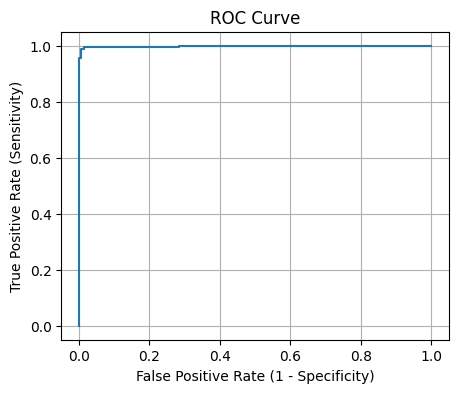

In [52]:
from sklearn import metrics
# following code are based on week1's tut
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_result_2)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title("ROC Curve")
plt.grid(True)

In [53]:
print('AUC', metrics.roc_auc_score(y_test, test_result_2))

AUC 0.9986910371745443


In [1]:
!jupyter nbconvert --to script F24_MIE_Project_1.ipynb

[NbConvertApp] Converting notebook F24_MIE_Project_1.ipynb to script
[NbConvertApp] Writing 47128 bytes to F24_MIE_Project_1.py
